In [5]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "3" # choose which GPU you want to use

from tempfile import gettempdir
import urllib
import zipfile
import numpy as np
import random
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

1.11.0


In [6]:
from tensorflow.examples.tutorials.mnist import input_data
# load mnist data
mnist = input_data.read_data_sets("data", one_hot=True)


Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [162]:
# setting 
feature_dims = 2
neurons = 5
classes = 1
learning_rate = 0.1
def fully_connected_layer(x_inputs, out_dim, name='fc'):
    """ Low level method
        x_inputs: a batch examples [batch_size, feature_dims]
        out_dim: neurons in this layer.
    """ 
    in_dim = x_inputs.shape[-1] # feature_dims
    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        weights = tf.get_variable("weights", shape=[in_dim, out_dim])
        bias = tf.get_variable("bias", shape=[out_dim])
        out = tf.matmul(x_inputs, weights) + bias
        return out
# xor task
xor_data = np.array([[1, 0],
                    [0, 1],
                    [1, 1],
                    [0, 0]])
xor_label = np.array([[1], [1], [0], [0]])

with tf.Graph().as_default() as g:
    x_input = tf.placeholder(tf.float32, [None, 2])
    y_label = tf.placeholder(tf.float32, [None, 1])
    # start building your model and meet the requirements
    # from here
    
    out = fully_connected_layer(x_input,6,'L1')
    out = fully_connected_layer( tf.sigmoid(out),1, "L2")
    out = tf.sigmoid(out)

    loss = tf.reduce_mean((out-y_label)**2, name="Logist")
    optimizer = tf.train.AdamOptimizer(learning_rate)
    
    training_op = optimizer.minimize(loss,name = "training_op")
    init = tf.global_variables_initializer()
    

with tf.Session(graph=g) as sess:
    # start run the seesion and meet the requrements
    # from here
    sess.run(init)
    for i in range(100):
        sess.run([loss,training_op],feed_dict={x_input: xor_data,y_label: xor_label})
        
    x = sess.run(out,feed_dict={x_input: xor_data})
    with tf.variable_scope("L1", reuse=True):
        print('full connected layer 1 w')
        v = tf.get_variable("weights")
        print(sess.run(v))
        
        print('full connected layer 1 bias')
        v = tf.get_variable("bias")
        print(sess.run(v))
    with tf.variable_scope("L2", reuse=True):
        print('full connected layer 1 w')
        v = tf.get_variable("weights")
        print(sess.run(v))
        
        print('full connected layer 1 bias')
        v = tf.get_variable("bias")
        print(sess.run(v))
        
#         vs.
#     var = [v for v in tf.trainable_variables()][0]
    print('acc:',sum((xor_label==np.round(x))/4)[0])
    

full connected layer 1 w
[[-6.2220893  -0.53706723  2.9599993  -5.7578382   6.3434434  -6.9728923 ]
 [ 4.6419377  -0.22326803 -5.282519    7.6141953  -4.604753   -6.415772  ]]
full connected layer 1 bias
[-1.9162577  -0.90517175 -0.7304128   2.4763248   1.9582983   2.0814915 ]
full connected layer 1 w
[[ 4.6504145 ]
 [ 0.54976463]
 [ 3.1749053 ]
 [-3.4743433 ]
 [-1.9929037 ]
 [-3.0789042 ]]
full connected layer 1 bias
[2.1787846]
acc: 1.0


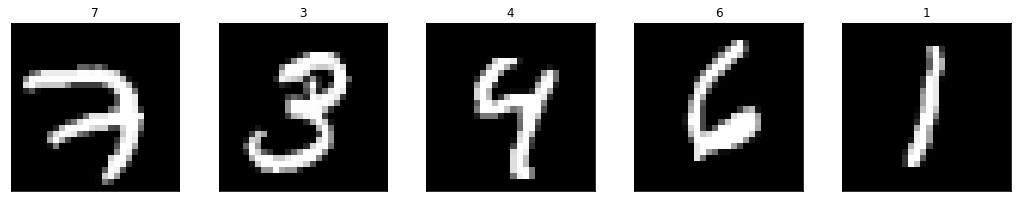

In [4]:

n = 5
plt.figure(figsize=(18,18))
for i in range(5):
    plt.subplot(n, n, i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(mnist.train.labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

with tf.Graph().as_default() as g:
    ## meet the requirements
    ## then you will
    pass

with tf.Session(graph=g) as sess:
    ## just do it
    pass